## Import necessary libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

## Import the data

In [2]:
cococola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cococola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## Data understanding

In [3]:
cococola.shape

(42, 2)

In [4]:
cococola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
cococola.dtypes

Quarter     object
Sales      float64
dtype: object

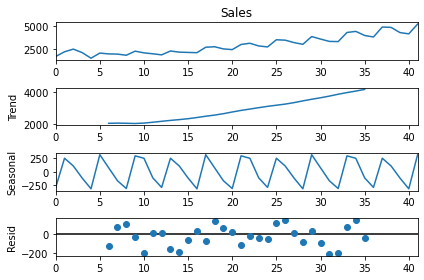

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(cococola['Sales'],period=12).plot()
plt.show()

In [7]:
cococola['Quarter_extend'] = cococola.Quarter.apply(lambda x : x.split('_')[0])
cococola['Year'] = cococola.Quarter.apply(lambda x : x.split('_')[1]).astype(int)
cococola

,Quarter,Sales,Quarter_extend,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


## Visualise the data

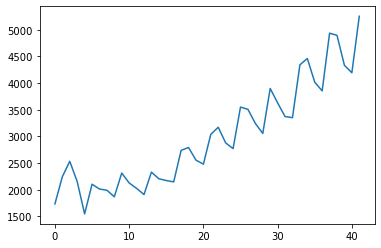

In [8]:
cococola['Sales'].plot()
plt.show()

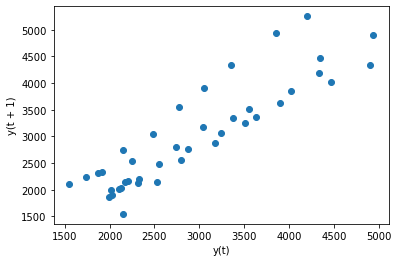

In [9]:
from pandas.plotting import lag_plot
lag_plot(cococola['Sales'])
plt.show()

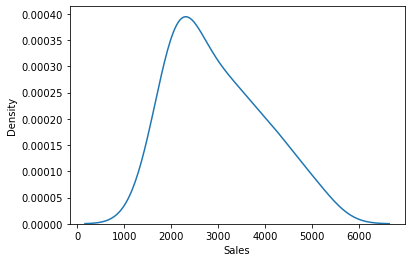

In [10]:
sns.distplot(cococola['Sales'],hist=False)
plt.show()

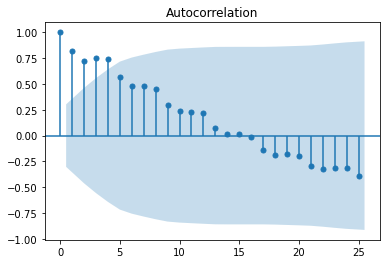

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cococola['Sales'],lags=25)
plt.show()

In [12]:
cococola_2 = cococola.copy()

In [13]:
quarter_dummy = pd.get_dummies(cococola_2.Quarter_extend)

In [14]:
data = pd.concat([cococola_2,quarter_dummy],axis = 1)

In [15]:
data

,Quarter,Sales,Quarter_extend,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [16]:
data['t'] = np.arange(1,43)
data['t_squared'] = data['t']*data['t']
data['log_sales'] = np.log(data.Sales)
data

,Quarter,Sales,Quarter_extend,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


## Model Building | Model Training | Model Testing

### Data splitting

In [17]:
train_data = data.head(38)
test_data = data.tail(4)

In [18]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data = train_data).fit()
pred_linear = linear_model.predict(test_data['t'])
rmse_linear = np.sqrt(np.mean(((test_data.Sales)-(pred_linear))**2))
rmse_linear

591.553295722396

In [19]:
#Exponential

exp = smf.ols('log_sales~t',data=train_data).fit()
pred_exp = exp.predict(test_data['t'])
rmse_exp = np.sqrt(np.mean(((test_data.Sales)-(np.exp(pred_exp)))**2))
rmse_exp

466.2479731067161

In [20]:
#Quadratic 

quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_quad = quad.predict(test_data[['t','t_squared']])
rmse_quad = np.sqrt(np.mean(((test_data.Sales)-(pred_quad))**2))
rmse_quad

475.56183518315606

In [21]:
#Additive seasonality 

add_season = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train_data).fit()
pred_add_season = add_season.predict(test_data[['Q1','Q2','Q3','Q4']])
rmse_add_season = np.sqrt(np.mean(((test_data.Sales)-(pred_add_season))**2))
rmse_add_season

1860.0238154547274

In [22]:
#Additive Seasonality Quadratic 

add_season_quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train_data).fit()
pred_add_season_quad = add_season_quad.predict(test_data[['Q1','Q2','Q3','Q4','t','t_squared']])
rmse_add_season_quad = np.sqrt(np.mean(((test_data.Sales)-(pred_add_season_quad))**2))
rmse_add_season_quad

301.73800719349674

In [23]:
##Multiplicative Seasonality

Mul_season = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = train_data).fit()
pred_Mult_season = Mul_season.predict(test_data)
rmse_Mult_season = np.sqrt(np.mean(((test_data.Sales)-(np.exp(pred_Mult_season)))**2))
rmse_Mult_season

1963.3896400779668

In [24]:
#Multiplicative Additive Seasonality 

Mul_Add_season = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train_data).fit()
pred_Mult_add_season = pd.Series(Mul_Add_season.predict(test_data))
rmse_Mult_add_season = np.sqrt(np.mean((np.array(test_data.Sales)-np.array(np.exp(pred_Mult_add_season)))**2))
rmse_Mult_add_season

225.52439049827947

## Compare the RMSE Results

In [25]:
rmse_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_season","rmse_add_season_quad","rmse_Mult_season","rmse_Mult_add_season"]),
             "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_season,rmse_add_season_quad,rmse_Mult_season,rmse_Mult_add_season])}
table_rmse_data = pd.DataFrame(rmse_data)
table_rmse_data.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_season,225.524390
4,rmse_add_season_quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_season,1860.023815
5,rmse_Mult_season,1963.389640


## Observation

## Multiplicative Additive Seasonality is least error value (RMSE 225.5)

## Predict for new data

In [26]:
new_data = pd.DataFrame({'Quarter_ext':['Q3','Q4','Q1','Q2']})
new_data

,Quarter_ext
0,Q3
1,Q4
2,Q1
3,Q2


In [27]:
new_data['t'] = np.arange(43,47)

In [28]:
new_data

,Quarter_ext,t
0,Q3,43
1,Q4,44
2,Q1,45
3,Q2,46


In [29]:
dummy = pd.get_dummies(new_data.Quarter_ext)

In [30]:
pred = pd.concat([new_data,dummy],axis=1)

In [31]:
model_full = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = data).fit()
pred_new = pd.Series(model_full.predict(pred))

In [32]:
pred["predicted_sales"] = pd.Series(np.exp(pred_new))
new_var = pd.concat([data,pred])
new_var

,Quarter,Sales,Quarter_extend,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales,Quarter_ext,predicted_sales
0,Q1_86,1734.827000,Q1,86.0,1,0,0,0,1,1.0,7.458663,NaN,NaN
1,Q2_86,2244.960999,Q2,86.0,0,1,0,0,2,4.0,7.716443,NaN,NaN
2,Q3_86,2533.804993,Q3,86.0,0,0,1,0,3,9.0,7.837477,NaN,NaN
3,Q4_86,2154.962997,Q4,86.0,0,0,0,1,4,16.0,7.675529,NaN,NaN
4,Q1_87,1547.818996,Q1,87.0,1,0,0,0,5,25.0,7.344602,NaN,NaN
5,Q2_87,2104.411995,Q2,87.0,0,1,0,0,6,36.0,7.651791,NaN,NaN
6,Q3_87,2014.362999,Q3,87.0,0,0,1,0,7,49.0,7.608058,NaN,NaN
7,Q4_87,1991.746998,Q4,87.0,0,0,0,1,8,64.0,7.596767,NaN,NaN
8,Q1_88,1869.049999,Q1,88.0,1,0,0,0,9,81.0,7.533186,NaN,NaN
9,Q2_88,2313.631996,Q2,88.0,0,1,0,0,10,100.0,7.746574,NaN,NaN


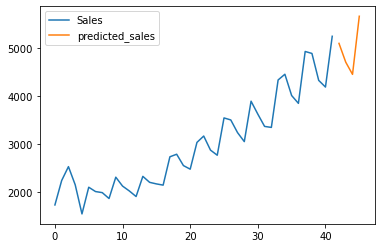

In [33]:
new_var[['Sales','predicted_sales']].reset_index(drop=True).plot()
plt.show()

## ============================== End ====================================